# EDA and FE on Titanic Dataset

# We Apply FE

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore' , message = 'Bhag yaha se')

In [4]:
df = pd.read_csv("C:\\Users\\hs081\\Downloads\\archive\\Titanic-Dataset.csv")

In [5]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [520]:
[features for features in df.columns if df[features].isnull().sum() > 0]

['Age', 'Cabin', 'Embarked']

<AxesSubplot:>

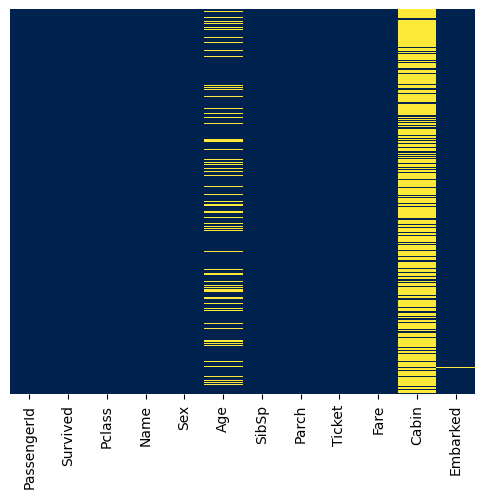

In [12]:
plt.rcParams['figure.figsize'] = (6,5)
sns.heatmap(df.isnull() , yticklabels = False , cbar = False, cmap = 'cividis')

In [14]:
df[df.isnull().any(axis = 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [523]:
df[~df.isnull().any(axis = 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [524]:
df.duplicated().sum()

0

In [18]:
df_temp = df.drop('PassengerId' ,axis = 1)

<AxesSubplot:>

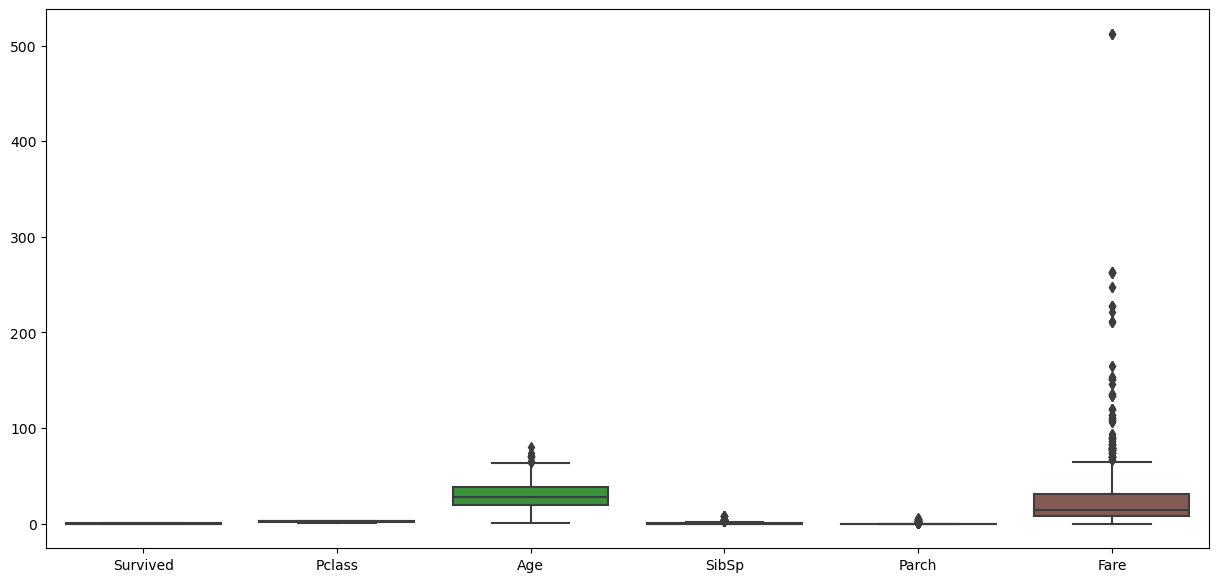

In [19]:
plt.figure(figsize = [15,7])
sns.boxplot(data = df_temp)

In [527]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [528]:
df.drop('PassengerId' , axis = 1 , inplace = True)

In [529]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [530]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [531]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [532]:
from sklearn.preprocessing import LabelEncoder

In [533]:
encoder = LabelEncoder()

In [534]:
df['Sex'] = encoder.fit_transform(df['Sex'])

In [535]:
df['Sex'] = df['Sex'].astype(int)

In [536]:
# df1 = pd.DataFrame(encoder.fit_transform(df[['Sex']]) , columns = ['Gender'])

In [537]:
# pd.concat([df , df1] , axis= 1)

In [538]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

<AxesSubplot:>

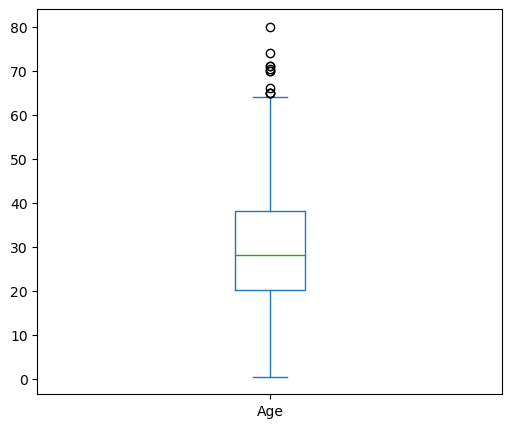

In [22]:
# sns.boxplot(data = df['Age'])
df['Age'].plot(kind = 'box')

In [540]:
df[df['Age']> 65]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,0,2,"Wheadon, Mr. Edward H",1,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,0,1,"Goldschmidt, Mr. George B",1,71.0,0,0,PC 17754,34.6542,A5,C
116,0,3,"Connors, Mr. Patrick",1,70.5,0,0,370369,7.7500,NaN,Q
493,0,1,"Artagaveytia, Mr. Ramon",1,71.0,0,0,PC 17609,49.5042,NaN,C
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",1,80.0,0,0,27042,30.0000,A23,S
672,0,2,"Mitchell, Mr. Henry Michael",1,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,0,1,"Crosby, Capt. Edward Gifford",1,70.0,1,1,WE/P 5735,71.0000,B22,S
851,0,3,"Svensson, Mr. Johan",1,74.0,0,0,347060,7.7750,NaN,S


<AxesSubplot:ylabel='Density'>

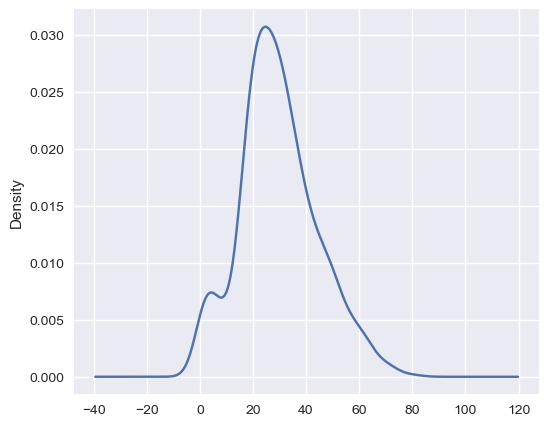

In [541]:
df['Age'].plot(kind = 'kde')

In [542]:
df['Age'].skew()

0.38910778230082704

In [543]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [544]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [545]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [546]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [547]:
df['Embarked'].value_counts().index[0]

'S'

In [548]:
mode = df['Embarked'].mode()[0]

In [549]:
mode

'S'

In [550]:
df['Embarked'] = df['Embarked'].replace(np.nan , mode)

In [551]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [552]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [553]:
from sklearn.preprocessing import OrdinalEncoder

In [554]:
encoder = OrdinalEncoder(categories=[['S', 'C', 'Q']])

In [555]:
df['Embarked'] = encoder.fit_transform(df[['Embarked']])

In [556]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked    float64
dtype: object

In [557]:
df['Embarked'] = df['Embarked'].astype(int)

In [558]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked      int32
dtype: object

In [559]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [560]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1


In [561]:
df['Names'] = df['Name']

In [562]:
df.drop('Name' , axis =1 , inplace = True)

In [563]:
df['Tickets'] = df['Ticket']
df['Cabins'] = df['Cabin']

In [564]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Names,Tickets,Cabins
0,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,"Braund, Mr. Owen Harris",A/5 21171,NaN
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85


In [565]:
df.drop(['Ticket' , 'Cabin'] , axis = 1 , inplace = True)

In [566]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Names,Tickets,Cabins
0,0,3,1,22.0,1,0,7.2500,0,"Braund, Mr. Owen Harris",A/5 21171,NaN
1,1,1,0,38.0,1,0,71.2833,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85


In [567]:
df.rename(columns = {
    'Names' : 'Name',
    'Tickets' : 'Ticket',
    'Cabins' : 'Cabin'
} , inplace = True)

In [568]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Ticket,Cabin
0,0,3,1,22.0,1,0,7.2500,0,"Braund, Mr. Owen Harris",A/5 21171,NaN
1,1,1,0,38.0,1,0,71.2833,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85


In [569]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [570]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.116569
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,-0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


<AxesSubplot:>

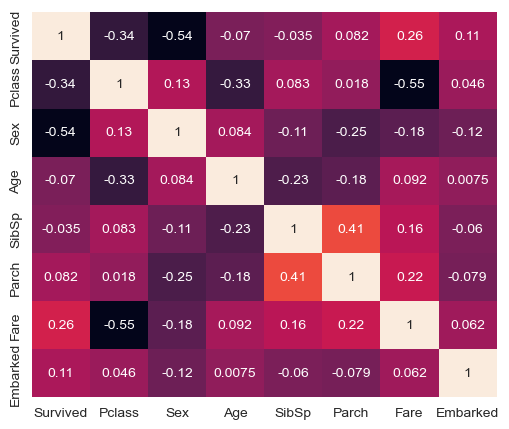

In [571]:
sns.heatmap(df.corr(), cbar = False , annot = True)

In [572]:
df['Family_size'] = df['SibSp'] + df['Parch'] + 1

In [573]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Ticket,Cabin,Family_size
0,0,3,1,22.000000,1,0,7.2500,0,"Braund, Mr. Owen Harris",A/5 21171,NaN,2
1,1,1,0,38.000000,1,0,71.2833,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,2
2,1,3,0,26.000000,0,0,7.9250,0,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN,1
3,1,1,0,35.000000,1,0,53.1000,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123,2
4,0,3,1,35.000000,0,0,8.0500,0,"Allen, Mr. William Henry",373450,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,"Montvila, Rev. Juozas",211536,NaN,1
887,1,1,0,19.000000,0,0,30.0000,0,"Graham, Miss. Margaret Edith",112053,B42,1
888,0,3,0,29.699118,1,2,23.4500,0,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607,NaN,4
889,1,1,1,26.000000,0,0,30.0000,1,"Behr, Mr. Karl Howell",111369,C148,1


In [574]:
def transform(x):
    if(x == 1):
        return 'alone'
    elif(x > 1 and x <= 4):
        return 'Small'
    elif(x > 4 and x <= 6):
        return 'medium'
    else:
        return 'large'

In [575]:
df['Family_type'] = df['Family_size'].apply(transform)

In [576]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Ticket,Cabin,Family_size,Family_type
0,0,3,1,22.0,1,0,7.2500,0,"Braund, Mr. Owen Harris",A/5 21171,NaN,2,Small
1,1,1,0,38.0,1,0,71.2833,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,2,Small


In [27]:
pd.crosstab(df['Survived'] , df['Family_type'] , normalize = 'columns') * 100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [578]:
df[(df['Family_type'] == 'Small') & (df['Pclass'] == 1) & (df['Sex'] == 0) ]['Pclass'].sum()

56

In [579]:
df[(df['Family_type'] == 'Small') & (df['Pclass'] == 1) & (df['Sex'] == 1) ]['Pclass'].sum()

45

In [580]:
df[(df['Family_type'] == 'alone') & (df['Pclass'] == 1 & (df['Sex'] == 0) ) ]['Pclass'].sum()

34

In [581]:
df[(df['Family_type'] == 'alone') & (df['Pclass'] == 1 & (df['Sex'] == 1) ) ]['Pclass'].sum()

75

In [582]:
df[(df['Family_type'] == 'medium') & (df['Pclass'] == 1) ]['Pclass'].sum()

6

In [583]:
df[(df['Family_type'] == 'large') & (df['Pclass'] == 1) ]['Pclass'].sum()

0

### Passengers Travelling with atmost 4 Family members or alone have higher chances of Survival

In [584]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Ticket,Cabin,Family_size,Family_type
0,0,3,1,22.0,1,0,7.2500,0,"Braund, Mr. Owen Harris",A/5 21171,NaN,2,Small
1,1,1,0,38.0,1,0,71.2833,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,2,Small


In [585]:
maxi = df['Fare'].describe().values[7]

In [586]:
df[df['Fare'] == maxi]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Ticket,Cabin,Family_size,Family_type
258,1,1,0,35.0,0,0,512.3292,1,"Ward, Miss. Anna",PC 17755,NaN,1,alone
679,1,1,1,36.0,0,1,512.3292,1,"Cardeza, Mr. Thomas Drake Martinez",PC 17755,B51 B53 B55,2,Small
737,1,1,1,35.0,0,0,512.3292,1,"Lesurer, Mr. Gustave J",PC 17755,B101,1,alone


In [587]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Ticket,Cabin,Family_size,Family_type
0,0,3,1,22.000000,1,0,7.2500,0,"Braund, Mr. Owen Harris",A/5 21171,NaN,2,Small
1,1,1,0,38.000000,1,0,71.2833,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,2,Small
2,1,3,0,26.000000,0,0,7.9250,0,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN,1,alone
3,1,1,0,35.000000,1,0,53.1000,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123,2,Small
4,0,3,1,35.000000,0,0,8.0500,0,"Allen, Mr. William Henry",373450,NaN,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,"Montvila, Rev. Juozas",211536,NaN,1,alone
887,1,1,0,19.000000,0,0,30.0000,0,"Graham, Miss. Margaret Edith",112053,B42,1,alone
888,0,3,0,29.699118,1,2,23.4500,0,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607,NaN,4,Small
889,1,1,1,26.000000,0,0,30.0000,1,"Behr, Mr. Karl Howell",111369,C148,1,alone


In [588]:
df[df['Ticket'] ==  'W./C. 6607']

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Ticket,Cabin,Family_size,Family_type
783,0,3,1,29.699118,1,2,23.45,0,"Johnston, Mr. Andrew G",W./C. 6607,NaN,4,Small
888,0,3,0,29.699118,1,2,23.45,0,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607,NaN,4,Small


In [589]:
df[df['Ticket'] == '347082']

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Ticket,Cabin,Family_size,Family_type
13,0,3,1,39.0,1,5,31.275,0,"Andersson, Mr. Anders Johan",347082,NaN,7,large
119,0,3,0,2.0,4,2,31.275,0,"Andersson, Miss. Ellis Anna Maria",347082,NaN,7,large
541,0,3,0,9.0,4,2,31.275,0,"Andersson, Miss. Ingeborg Constanzia",347082,NaN,7,large
542,0,3,0,11.0,4,2,31.275,0,"Andersson, Miss. Sigrid Elisabeth",347082,NaN,7,large
610,0,3,0,39.0,1,5,31.275,0,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",347082,NaN,7,large
813,0,3,0,6.0,4,2,31.275,0,"Andersson, Miss. Ebba Iris Alfrida",347082,NaN,7,large
850,0,3,1,4.0,4,2,31.275,0,"Andersson, Master. Sigvard Harald Elias",347082,NaN,7,large


In [590]:
df[df['Ticket'] == '3101278']

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Ticket,Cabin,Family_size,Family_type
85,1,3,0,33.0,3,0,15.85,0,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",3101278,NaN,4,Small
206,0,3,1,32.0,1,0,15.85,0,"Backstrom, Mr. Karl Alfred",3101278,NaN,2,Small


In [591]:
df['In_Fare'] = df['Fare'] / df['Family_size']

In [592]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Ticket,Cabin,Family_size,Family_type,In_Fare
0,0,3,1,22.000000,1,0,7.2500,0,"Braund, Mr. Owen Harris",A/5 21171,NaN,2,Small,3.62500
1,1,1,0,38.000000,1,0,71.2833,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,2,Small,35.64165
2,1,3,0,26.000000,0,0,7.9250,0,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN,1,alone,7.92500
3,1,1,0,35.000000,1,0,53.1000,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123,2,Small,26.55000
4,0,3,1,35.000000,0,0,8.0500,0,"Allen, Mr. William Henry",373450,NaN,1,alone,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,"Montvila, Rev. Juozas",211536,NaN,1,alone,13.00000
887,1,1,0,19.000000,0,0,30.0000,0,"Graham, Miss. Margaret Edith",112053,B42,1,alone,30.00000
888,0,3,0,29.699118,1,2,23.4500,0,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607,NaN,4,Small,5.86250
889,1,1,1,26.000000,0,0,30.0000,1,"Behr, Mr. Karl Howell",111369,C148,1,alone,30.00000


In [593]:
df[df['In_Fare'] > 500]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Ticket,Cabin,Family_size,Family_type,In_Fare
258,1,1,0,35.0,0,0,512.3292,1,"Ward, Miss. Anna",PC 17755,NaN,1,alone,512.3292
737,1,1,1,35.0,0,0,512.3292,1,"Lesurer, Mr. Gustave J",PC 17755,B101,1,alone,512.3292


<AxesSubplot:>

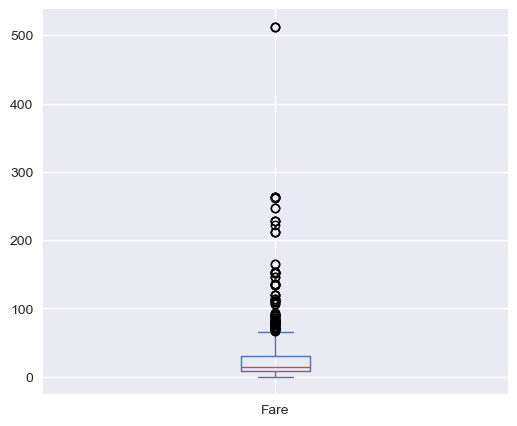

In [594]:
df['Fare'].plot(kind = 'box')

<AxesSubplot:>

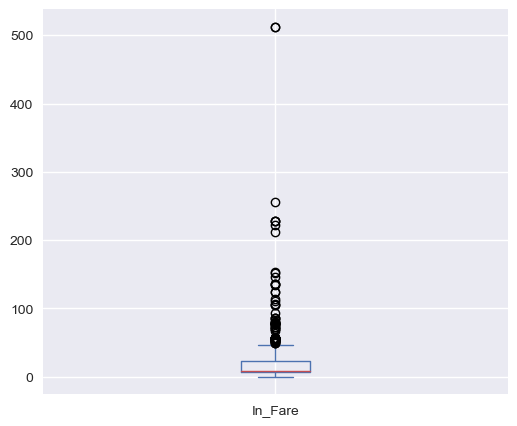

In [595]:
df['In_Fare'].plot(kind = 'box')

In [596]:
mode = df['Cabin'].str.get(0).mode()[0]

In [597]:
df['Cabin'] = df['Cabin'].fillna(mode)

In [598]:
df['Deck'] = df['Cabin'].str.get(0)

In [599]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Ticket,Cabin,Family_size,Family_type,In_Fare,Deck
0,0,3,1,22.0,1,0,7.2500,0,"Braund, Mr. Owen Harris",A/5 21171,C,2,Small,3.62500,C
1,1,1,0,38.0,1,0,71.2833,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,2,Small,35.64165,C


In [600]:
df.drop(['Fare', 'SibSp' , 'Name', 'Parch' , 'Ticket' , 'Cabin'] , axis =1 , inplace = True)

In [601]:
df.head(2)

,Survived,Pclass,Sex,Age,Embarked,Family_size,Family_type,In_Fare,Deck
0,0,3,1,22.0,0,2,Small,3.62500,C
1,1,1,0,38.0,1,2,Small,35.64165,C


In [602]:
df.dtypes

Survived         int64
Pclass           int64
Sex              int32
Age            float64
Embarked         int32
Family_size      int64
Family_type     object
In_Fare        float64
Deck            object
dtype: object

In [603]:
df['Family_type'] = df['Family_type'].map({'alone' : 0 , 'Small' : 1 , 'medium' : 2 , 'large' : 3})

In [604]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Family_size,Family_type,In_Fare,Deck
0,0,3,1,22.0,0,2,1,3.62500,C
1,1,1,0,38.0,1,2,1,35.64165,C
2,1,3,0,26.0,0,1,0,7.92500,C
3,1,1,0,35.0,0,2,1,26.55000,C
4,0,3,1,35.0,0,1,0,8.05000,C


In [605]:
df['Deck'].unique()

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [606]:
from sklearn.preprocessing import LabelEncoder

In [607]:
encoder = LabelEncoder()

In [608]:
df['Deck'] = encoder.fit_transform(df['Deck'])

In [609]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Family_size,Family_type,In_Fare,Deck
0,0,3,1,22.0,0,2,1,3.62500,2
1,1,1,0,38.0,1,2,1,35.64165,2
2,1,3,0,26.0,0,1,0,7.92500,2
3,1,1,0,35.0,0,2,1,26.55000,2
4,0,3,1,35.0,0,1,0,8.05000,2


In [610]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Embarked       0
Family_size    0
Family_type    0
In_Fare        0
Deck           0
dtype: int64

In [611]:
df.duplicated().sum()

108

In [612]:
df.drop_duplicates(inplace = True)

In [613]:
df.to_csv('Titanic Cleaned.csv' , index = False)

# EDA on Cleaned Titanic DataSet

In [614]:
df

,Survived,Pclass,Sex,Age,Embarked,Family_size,Family_type,In_Fare,Deck
0,0,3,1,22.000000,0,2,1,3.625000,2
1,1,1,0,38.000000,1,2,1,35.641650,2
2,1,3,0,26.000000,0,1,0,7.925000,2
3,1,1,0,35.000000,0,2,1,26.550000,2
4,0,3,1,35.000000,0,1,0,8.050000,2
...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.000000,2,6,2,4.854167,2
887,1,1,0,19.000000,0,1,0,30.000000,1
888,0,3,0,29.699118,0,4,1,5.862500,2
889,1,1,1,26.000000,1,1,0,30.000000,2


In [623]:
df['Pclass'].value_counts()

3    405
1    213
2    165
Name: Pclass, dtype: int64

In [616]:
pd.crosstab(df['Survived'] , df['Pclass'] , normalize = 'columns') * 100

Pclass,1,2,3
Survived,,,
0,36.619718,49.090909,74.320988
1,63.380282,50.909091,25.679012


Text(0.5, 1.0, 'Pclass vs Survival')

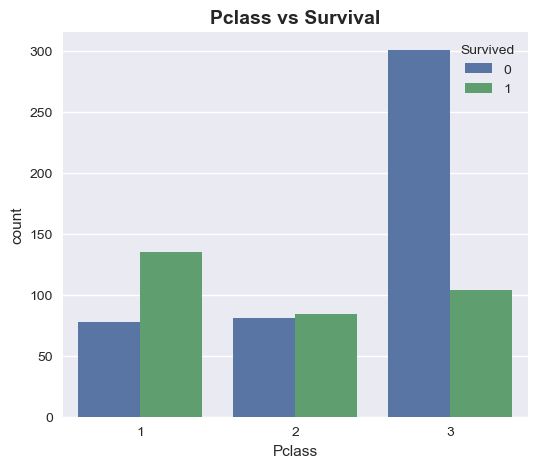

In [658]:
sns.countplot(x = 'Pclass' , hue = 'Survived' , data = df)
plt.title("Pclass vs Survival" , fontsize = 14, weight = 'bold')

In [620]:
df_temp = df.groupby('Pclass' , as_index = False)['Survived'].sum()

Text(0.5, 1.0, 'Pclass vs Survival')

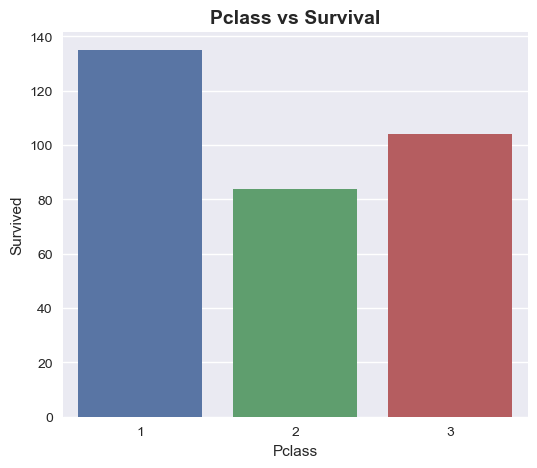

In [659]:
sns.barplot(x = 'Pclass' , y = 'Survived' , data = df_temp)
plt.title("Pclass vs Survival" , fontsize = 14, weight = 'bold')

## Observation : Survival oder According to Pclass (1 , 2 , 3)
### higher class have higher chances of Survival

In [630]:
pd.crosstab(df['Survived'] , df['Sex'] , normalize = 'columns')  * 100

Sex,0,1
Survived,,
0,25.938567,78.367347
1,74.061433,21.632653


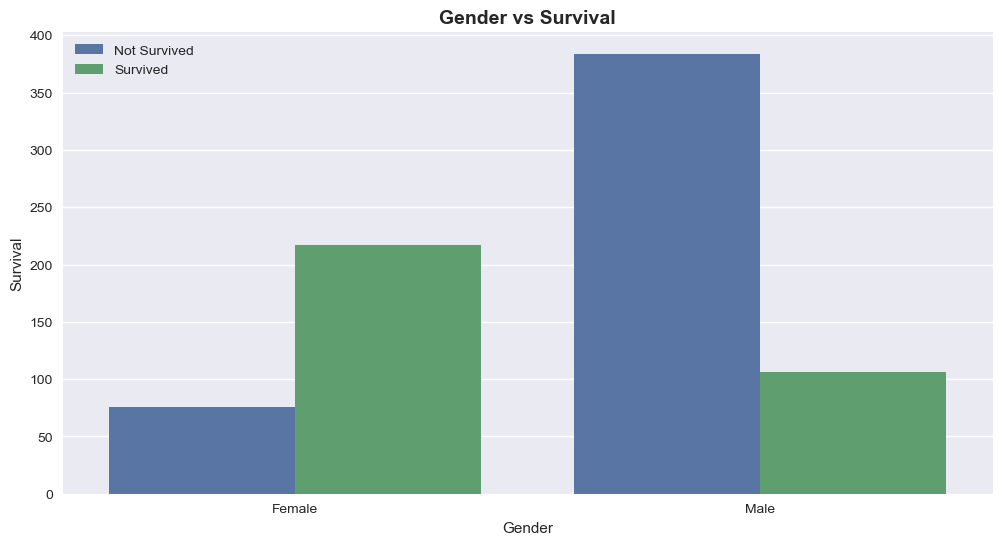

In [682]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Sex' , hue = 'Survived' , data = df )
plt.legend(loc ='upper left', labels = ['Not Survived' , 'Survived'])
plt.xticks(np.arange(2) , ['Female', 'Male'])
plt.title("Gender vs Survival" , fontsize = 14, weight = 'bold')
plt.xlabel("Gender" , fontsize = 11)
plt.ylabel("Survival" , fontsize = 11)
plt.show()

In [672]:
df_temp = df.groupby('Sex' , as_index = False)['Survived'].sum()

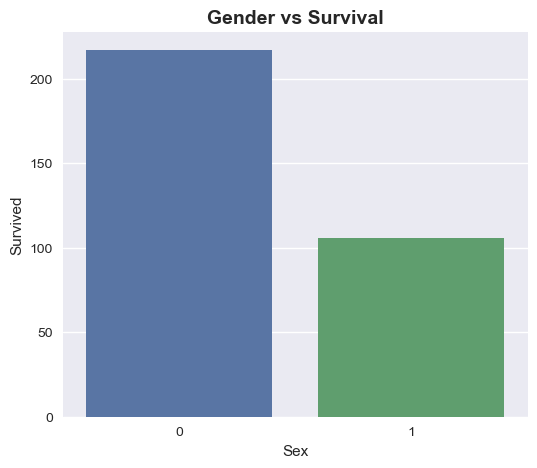

In [675]:
sns.barplot(x = 'Sex' , y = 'Survived' , data = df_temp)
plt.title("Gender vs Survival" , fontsize = 14, weight = 'bold')
plt.show()

### Observation : Female Have Higher Chances of Survival then Male 

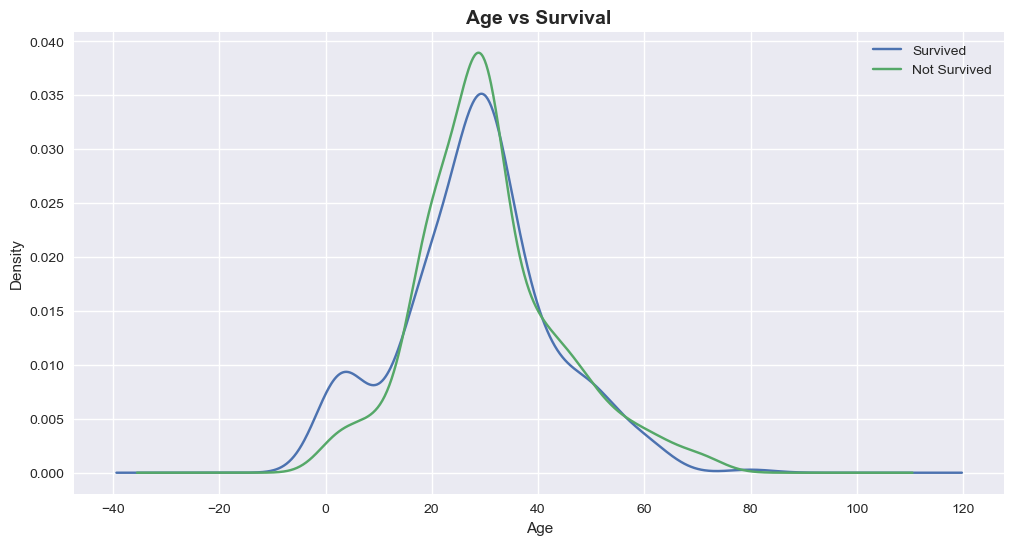

In [657]:
plt.figure(figsize = (12,6))
df[df['Survived']==1]['Age'].plot(kind  ='kde' , label = 'Survived')
df[df['Survived']==0]['Age'].plot(kind  ='kde' , label = 'Not Survived')
plt.title("Age vs Survival" , fontsize = 14, weight = 'bold')
plt.legend()
plt.xlabel('Age')
plt.show()

### Observation : Age below 20 Chances of Survival is High 
#anomali : Age between 35 to 37 Chances of Survial is high

##### why this anomali comes ??? 

##### Their are two reasons -> 
1. 35 to 37(age) -> most females
2. 35 to 37(age) -> Pclass == 1 Passengers are most

Now lets verify our assumption  ??? 

In [653]:
df[df['Sex'] == 0]['Age'].mean()

28.16763601686409

##### MY first Assumption is wrong

In [654]:
df[df['Pclass'] == 1]['Age'].mean()

37.02673432753385

##### MY Second Assumption is Correct

In [660]:
df['Embarked'].value_counts()

0    569
1    155
2     59
Name: Embarked, dtype: int64

In [656]:
pd.crosstab(df['Survived'] , df['Embarked'] , normalize = 'columns') * 100

Embarked,0,1,2
Survived,,,
0,62.565905,41.935484,66.101695
1,37.434095,58.064516,33.898305


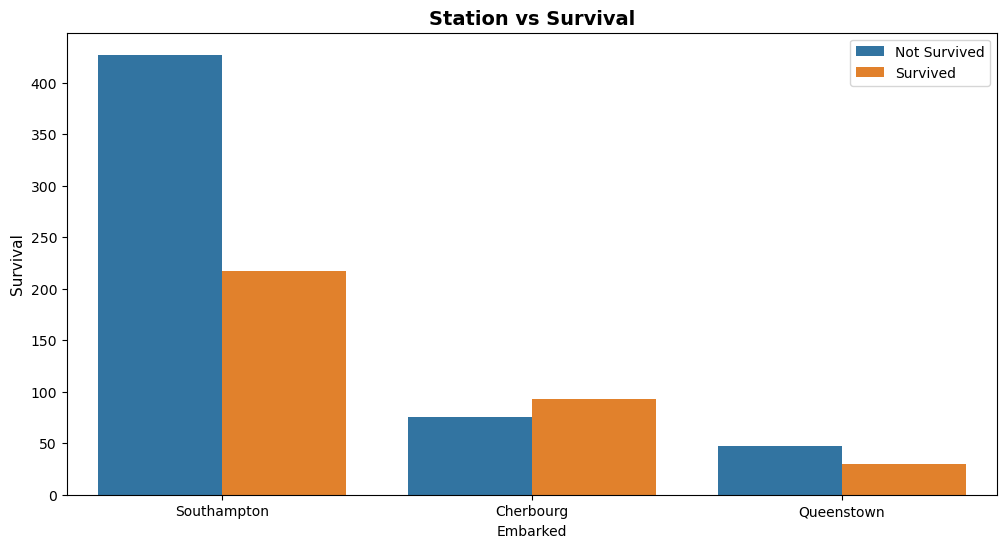

In [28]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Embarked' , hue = 'Survived' , data = df )
plt.legend(loc ='upper left', labels = ['Not Survived' , 'Survived'])
plt.xticks(np.arange(3) , ['Southampton', 'Cherbourg'  ,'Queenstown'])
plt.legend(loc = 'upper right' , labels = ['Not Survived' , 'Survived'])
plt.title("Station vs Survival" , fontsize = 14, weight = 'bold')
plt.ylabel("Survival" , fontsize = 11)
plt.show()

### Observation : Those Passengers Who had Started their Journey from Cherbourg had survived most

##### Their are two reasons -> 
1. Cherbourg(started Journey) -> most females
2. Cherbourg(started Journey) Pclass == 1 Passengers are most

Now lets verify our assumption  ??? 

In [678]:
df[(df['Pclass'] == 1) & (df['Sex'] == 0)]['Embarked'].value_counts()

0    50
1    42
2     1
Name: Embarked, dtype: int64

In [679]:
df_temp = df.groupby('Embarked' , as_index = False)['Survived'].sum()

In [680]:
df_temp

,Embarked,Survived
0,0,213
1,1,90
2,2,20


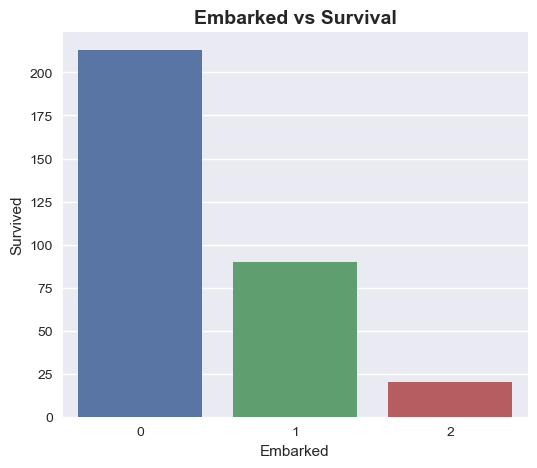

In [681]:
sns.barplot(x = 'Embarked' , y = 'Survived' , data = df_temp)
plt.title("Embarked vs Survival" , fontsize = 14, weight = 'bold')
plt.show()

In [685]:
pd.crosstab(df['Survived'] , df['Family_type'] , normalize = 'columns') * 100

Family_type,0,1,2,3
Survived,,,,
0,66.292135,42.402827,82.857143,80.0
1,33.707865,57.597173,17.142857,20.0


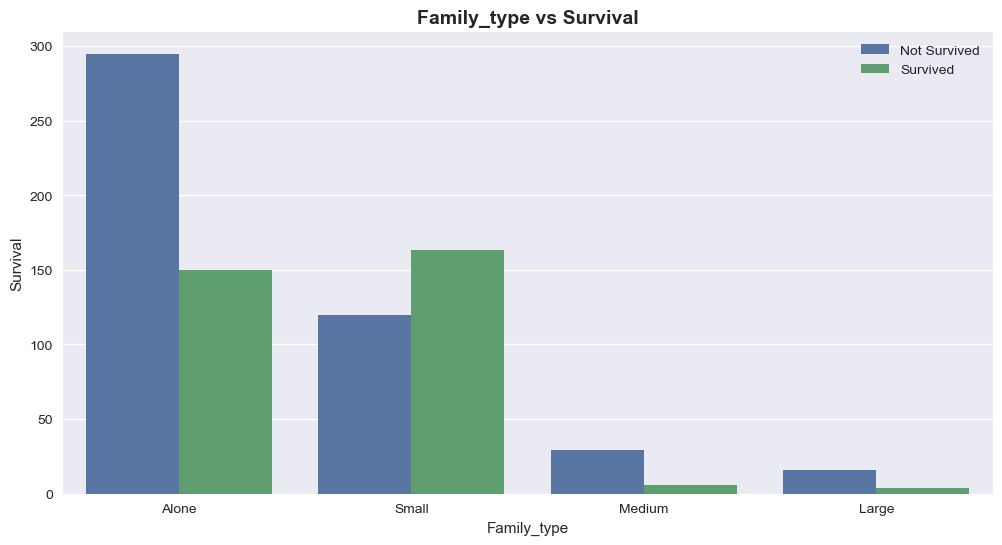

In [687]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Family_type' , hue = 'Survived' , data = df )
plt.legend(loc ='upper right', labels = ['Not Survived' , 'Survived'])
plt.xticks(np.arange(4) , ['Alone', 'Small', 'Medium' ,'Large'])
plt.title("Family_type vs Survival" , fontsize = 14, weight = 'bold')
plt.xlabel("Family_type" , fontsize = 11)
plt.ylabel("Survival" , fontsize = 11)
plt.show()

### observation : Those Passengers who travel Alone(1) or Small(<=4) Family Had survived Most

In [688]:
df_temp = df.groupby('Family_type' , as_index = False)['Survived'].sum()

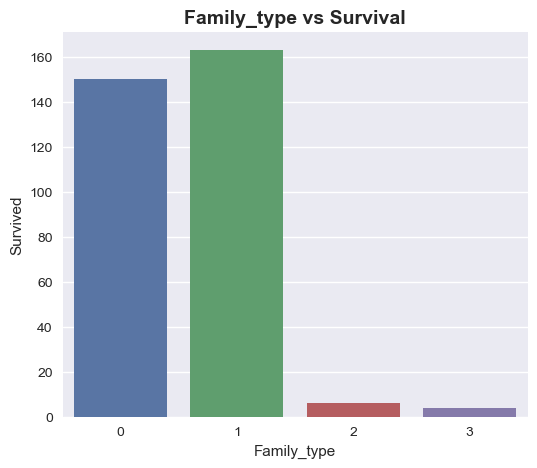

In [689]:
sns.barplot(x = 'Family_type' , y = 'Survived' , data = df_temp)
plt.title("Family_type vs Survival" , fontsize = 14, weight = 'bold')
plt.show()

<AxesSubplot:xlabel='In_Fare', ylabel='Count'>

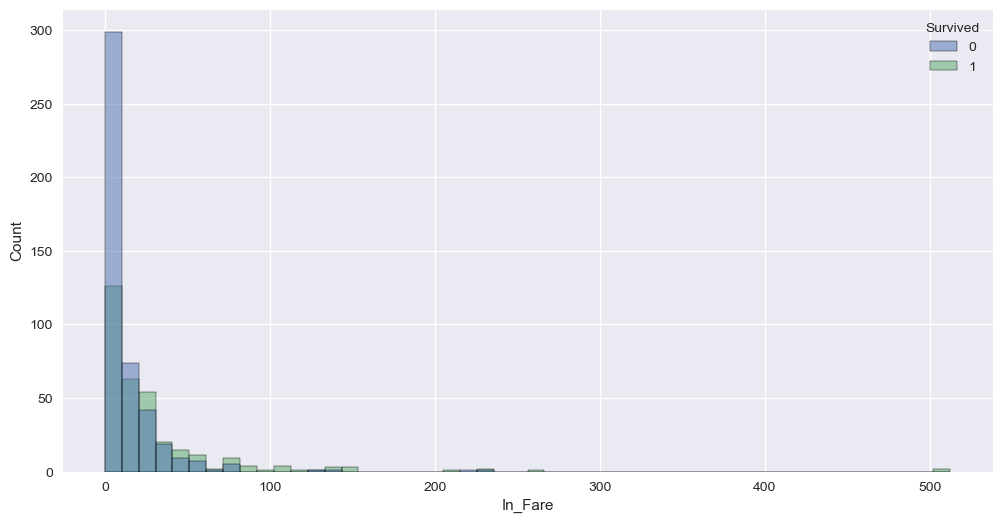

In [693]:
plt.figure(figsize = (12,6))
sns.histplot(x = 'In_Fare' , hue= 'Survived', data= df , bins = 50)

In [698]:
pd.crosstab(df['Survived'] , df['Deck'] , normalize = 'columns') * 100

Deck,0,1,2,3,4,5,6,7
Survived,,,,,,,,
0,53.333333,26.086957,65.101721,24.242424,25.0,38.461538,50.0,100.0
1,46.666667,73.913043,34.898279,75.757576,75.0,61.538462,50.0,0.0


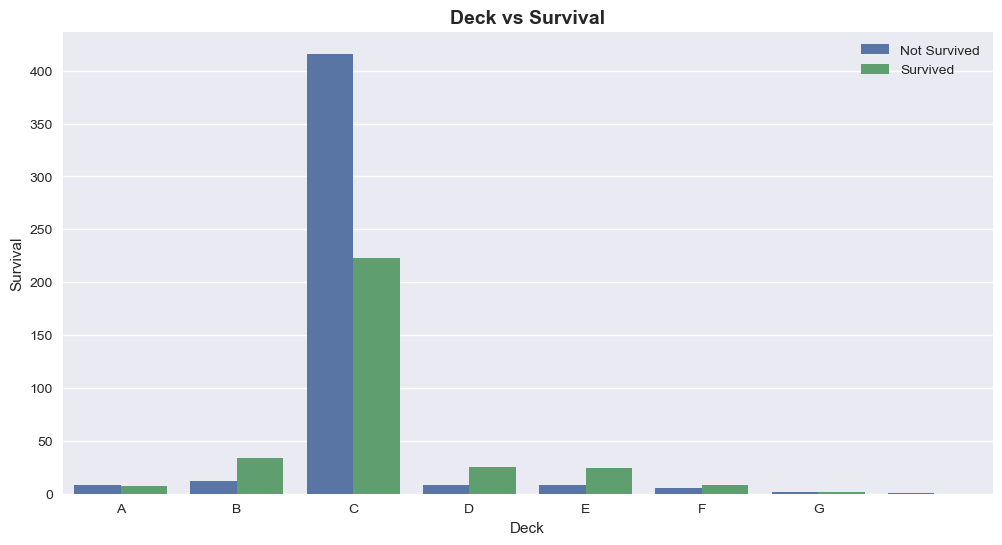

In [700]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Deck' , hue = 'Survived' , data = df )
plt.legend(loc ='upper right', labels = ['Not Survived' , 'Survived'])
plt.xticks(np.arange(7) , ['A', 'B', 'C' ,'D','E','F','G'])
plt.title("Deck vs Survival" , fontsize = 14, weight = 'bold')
plt.xlabel("Deck" , fontsize = 11)
plt.ylabel("Survival" , fontsize = 11)
plt.show()

In [701]:
df_temp = df.groupby('Deck' , as_index = False)['Survived'].sum()

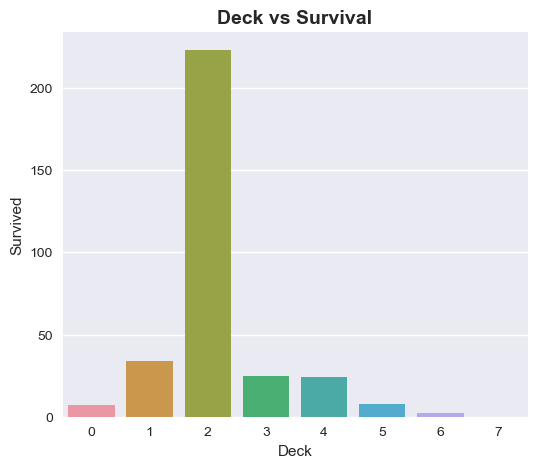

In [702]:
sns.barplot(x = 'Deck' , y = 'Survived' , data = df_temp)
plt.title("Deck vs Survival" , fontsize = 14, weight = 'bold')
plt.show()

### Observation : Deck B ,D , E , F  have higher chances of Survival